In [2]:
# to reload local packages when debugging
%load_ext autoreload
%autoreload 2

%cd /mnt/c/Users/resha/Documents/Github/balancing_framework/

/mnt/c/Users/resha/Documents/Github/balancing_framework


In [3]:
import pickle
import pandas as pd
import numpy as np


with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_bintp_labelled.pkl', 'rb') as f:
    df_bintp = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_labelled_episodes.pkl', 'rb') as f:
    df_original = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_labelled_episodes_fracdiff.pkl', 'rb') as f:
    df_fd = pickle.load(f)
# PZ algorithm has some look ahead so remove the episode labels, will be uesd only for some kind of analysis afterwards
df = df_original.drop(columns=['episode']) 
df = df_bintp[["volume", "vwap", "open", "close", "high", "low", "transactions", "tp_0.001"]].rename(columns={"tp_0.001": "label"}) # 0.01 0.001
# df



In [27]:
from framework import run_measurements, viz
from fracdiff import frac_diff_bestd, frac_diff_ffd

X = df.drop(columns=['label'])
y = df['label']
chunk_size = 500_000
# cold_start_size = 10_000
dataset_name = 'sp500'
model_name = 'random_forest'

a,c,p = run_measurements(X, y, chunk_size, dataset_name, model_name, num_runs=1, frac_diff=False)

RUNNING ADAPTATION MEASURE


  0%|          | 0/2 [00:00<?, ?it/s][I 2024-11-19 12:16:15,446] A new study created in memory with name: no-name-99e5430e-0444-4902-8c50-3029dda6b07a


Tuning run 1 of 2


[I 2024-11-19 12:16:27,819] Trial 0 finished with value: 0.8183666666666667 and parameters: {'n_estimators': 14, 'max_depth': 19}. Best is trial 0 with value: 0.8183666666666667.


Optimization Time: 0.20622824634992867 minutes
Training run 1 of 2


 50%|█████     | 1/2 [00:23<00:23, 23.01s/it][I 2024-11-19 12:16:38,514] A new study created in memory with name: no-name-5b11486d-9abe-4932-bd33-ffa9c70f34d7


Run 0 Accuracy: 0.8156
Tuning run 2 of 2


[I 2024-11-19 12:16:58,536] Trial 0 finished with value: 0.8081091251175917 and parameters: {'n_estimators': 27, 'max_depth': 6}. Best is trial 0 with value: 0.8081091251175917.


Optimization Time: 0.33371221541650203 minutes
Training run 2 of 2


100%|██████████| 2/2 [01:09<00:00, 34.92s/it]


Run 0 Accuracy: 0.7957
RUNNING CONSOLIDATION MEASURE


  0%|          | 0/2 [00:00<?, ?it/s][I 2024-11-19 12:17:25,320] A new study created in memory with name: no-name-898a63c7-e08f-4ba4-826e-ddb71da0c109


Tuning run 1 of 2


[I 2024-11-19 12:17:30,230] Trial 0 finished with value: 0.8031111111111111 and parameters: {'n_estimators': 3, 'max_depth': 23}. Best is trial 0 with value: 0.8031111111111111.


Optimization Time: 0.08185174373332606 minutes
Training run 1 of 2


 50%|█████     | 1/2 [00:09<00:09,  9.80s/it][I 2024-11-19 12:17:35,171] A new study created in memory with name: no-name-d9a7794f-3a7d-445a-9c6a-91b2e4f55679


Run 0 Accuracy: 0.8012
Tuning run 2 of 2


[I 2024-11-19 12:18:04,963] Trial 0 finished with value: 0.8081279397930385 and parameters: {'n_estimators': 20, 'max_depth': 8}. Best is trial 0 with value: 0.8081279397930385.


Optimization Time: 0.5103018118000667 minutes
Training run 2 of 2


100%|██████████| 2/2 [01:08<00:00, 34.02s/it]

Run 0 Accuracy: 0.8068


means: [0.81558   0.7956666], [0.80124 0.80685], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]
means: [0.89747496 0.88617792], [0.88668445 0.89308789], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]


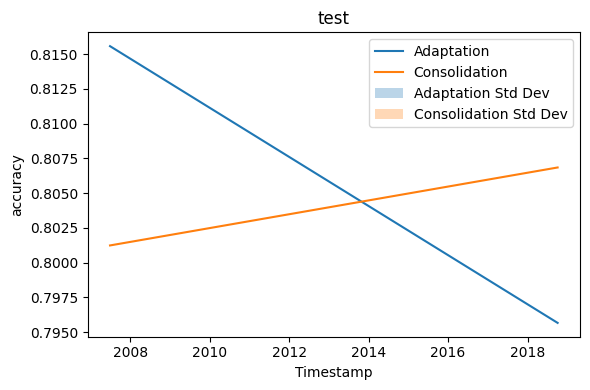

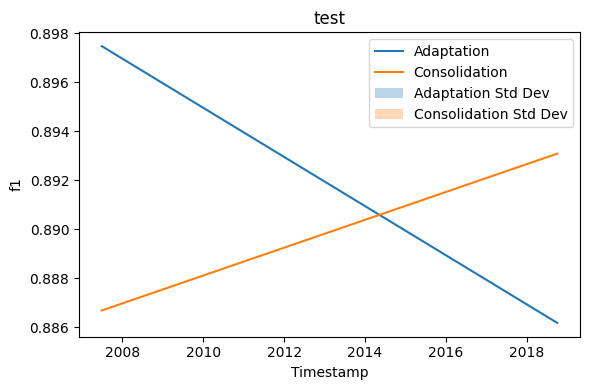

In [ ]:
# lowest tp 0.001 closest holding times most likely
viz(a, c, metric='accuracy', title='test') # Frac Diff , First Order Diff
viz(a, c, metric='f1', title='test') # Frac Diff , First Order Diff

means: [0.82614    0.82534211], [0.8243     0.82206719], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]
means: [0.29946007 0.01346801], [0.26405294 0.12443062], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]


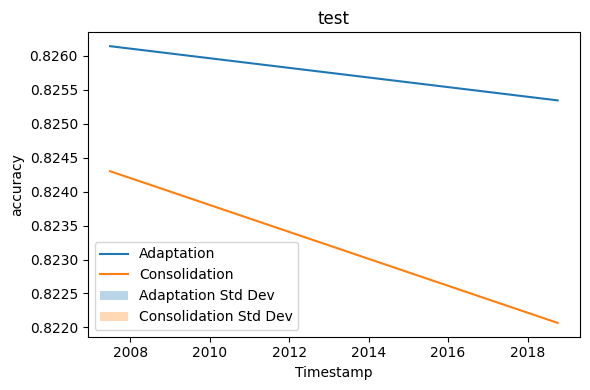

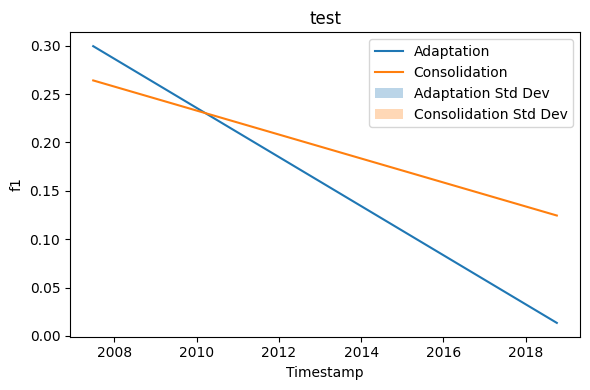

In [ ]:
# reasonable tp 0.01 least balanced classes of 3
viz(a, c, metric='accuracy', title='test') # Frac Diff , First Order Diff
viz(a, c, metric='f1', title='test') # Frac Diff , First Order Diff

means: [0.62534    0.59900477], [0.63082    0.65410232], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]
means: [0.63978464 0.5289533 ], [0.63983142 0.657868  ], std: [0. 0.], [0. 0.], timestamps: [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')], [Timestamp('2007-06-28 19:30:00-0400', tz='America/New_York')
 Timestamp('2018-10-04 12:55:00-0400', tz='America/New_York')]


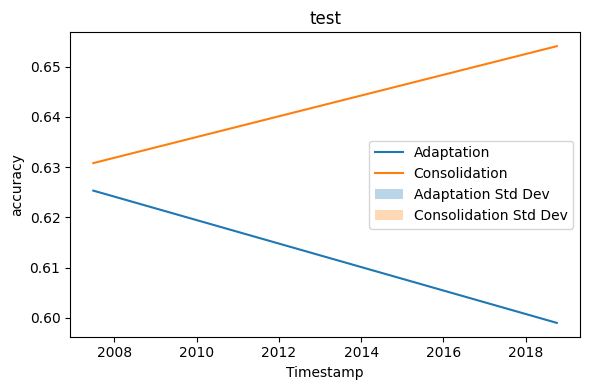

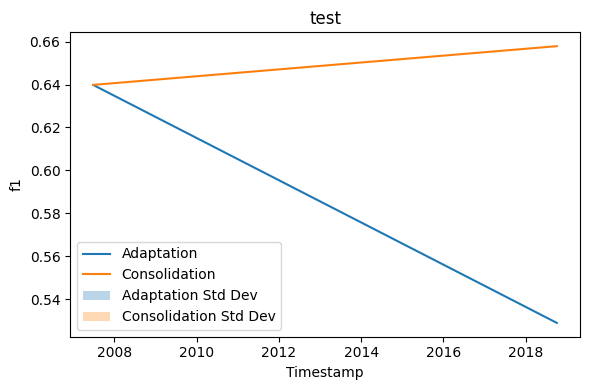

In [ ]:
# balanced tp classes 0.004
viz(a, c, metric='accuracy', title='test') # Frac Diff , First Order Diff
viz(a, c, metric='f1', title='test') # Frac Diff , First Order Diff

In [8]:
# read and print a pkl
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/results/consolidation_results_Original.pkl', 'rb') as f:
    c = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/results/adaptation_results_Original.pkl', 'rb') as f:
    a = pickle.load(f)

In [15]:
a

[{'accuracy_mean': 0.5570000000000002,
  'f1_mean': 0.0,
  'accuracy_std': 1.1102230246251565e-16,
  'f1_std': 0.0,
  'time_training_seconds': 0.3126598062000994,
  'time_test_seconds': 0.017482466799810935,
  'model_name': 'random_forest',
  'last_ts': Timestamp('2005-08-24 08:40:00-0400', tz='America/New_York')},
 {'accuracy_mean': 0.5364000000000001,
  'f1_mean': 0.0,
  'accuracy_std': 1.1102230246251565e-16,
  'f1_std': 0.0,
  'time_training_seconds': 0.29757204580037067,
  'time_test_seconds': 0.009801469499871018,
  'model_name': 'random_forest',
  'last_ts': Timestamp('2007-03-02 12:05:00-0500', tz='America/New_York')},
 {'accuracy_mean': 0.5283999999999999,
  'f1_mean': 0.0033812341504649195,
  'accuracy_std': 1.1102230246251565e-16,
  'f1_std': 0.0,
  'time_training_seconds': 3.055319818800308,
  'time_test_seconds': 0.025993577699773597,
  'model_name': 'random_forest',
  'last_ts': Timestamp('2008-06-11 13:10:00-0400', tz='America/New_York')},
 {'accuracy_mean': 0.5282,
  'f

means: [0.557      0.5364     0.5284     0.5282     0.523      0.5416
 0.5472     0.539      0.5258     0.5272     0.5296     0.5304
 0.5212     0.5192     0.5232     0.5068     0.5098     0.52051084], [0.54896 0.54736 0.54556 0.53426 0.5399  0.53506 0.53476 0.53992 0.53894
 0.53976 0.53536 0.53326 0.53566 0.54148 0.53596 0.52818 0.52918 0.52254], std: [1.11022302e-16 1.11022302e-16 1.11022302e-16 0.00000000e+00
 1.11022302e-16 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 1.11022302e-16 1.11022302e-16 0.00000000e+00
 1.11022302e-16 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00], [0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.11022302e-16 1.11022302e-16 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00], timestamps: [Timestamp('2005-08-24 08:40:00-0400', tz='America/New_York')
 Timestamp('2007-

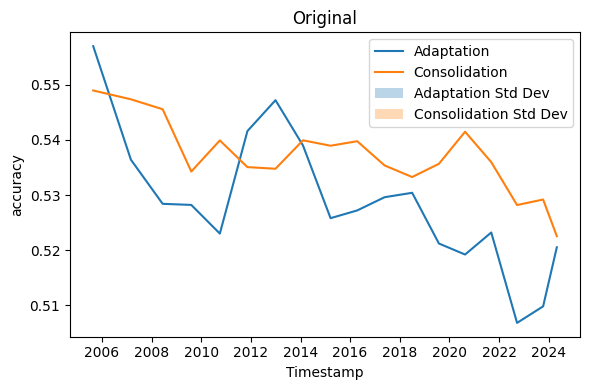

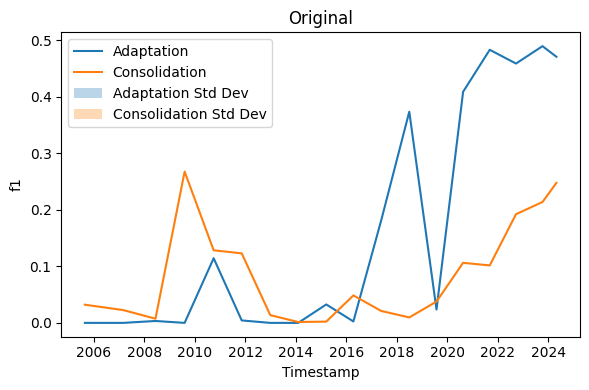

In [14]:
viz(a, c, metric='accuracy', title='Original') # Frac Diff , First Order Diff
viz(a, c, metric='f1', title='Original') # Frac Diff , First Order Diff

In [5]:
X, fd_change_pct = frac_diff_bestd(X)

volume
volume stationary with d=0.0 stat windows =9 out of 9 p-values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vwap
vwap stationary with d=0.25 stat windows =7 out of 9 p-values = [0.008095666767908991, 0.025931511376519768, 0.0013778592152762258, 0.1852128548194567, 1.6337951974871852e-06, 0.07308356800947235, 6.915786352112616e-08, 0.004419859336234985, 0.04946977381450395]
open
open stationary with d=0.25 stat windows =6 out of 9 p-values = [0.00771687291618469, 0.08563208621671398, 0.0011386828724444706, 0.17728860789708828, 5.727499914651303e-07, 0.06501883304278977, 9.094215141367207e-08, 0.0030737197484147, 0.04669310393262241]
close
close stationary with d=0.25 stat windows =6 out of 9 p-values = [0.007155320998279741, 0.0797247049068393, 0.0011311314942169775, 0.1686332629329363, 8.000171012087326e-07, 0.06518248544906258, 9.703437632746902e-08, 0.0029871989932518214, 0.04567940334522573]
high
high stationary with d=0.2 stat windows =6 out of 9 p-values = [0.03389280655

In [1]:
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_ta_fracdiff.pkl', 'rb') as f:
    df_fd_ta = pickle.load(f) # fracdiffed ohlcv + transactions + ~120 TA features + labels

NameError: name 'pickle' is not defined

In [ ]:
close = df['close']
close_diff = close.diff().dropna()
close_frac_diff = df_fd_ta['close'].dropna()

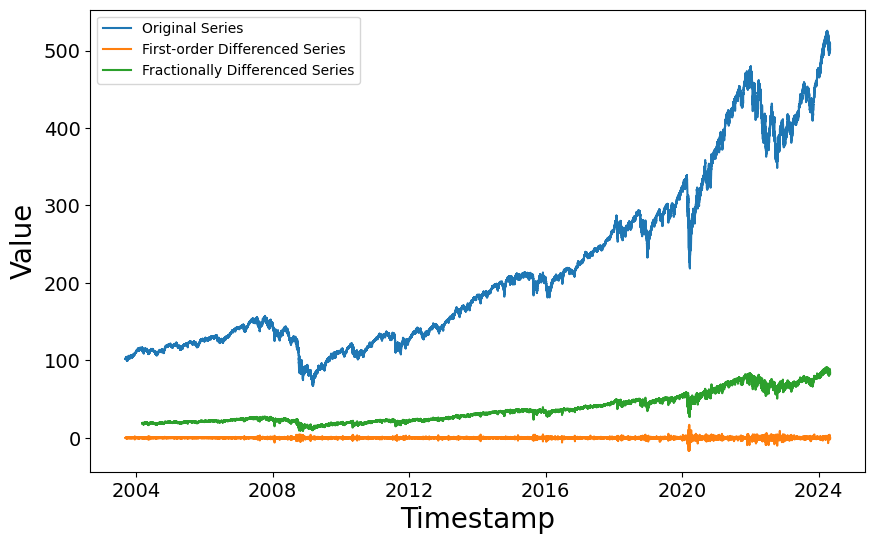

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use seaborn's set_theme for overall styling, though it's not strictly necessary for this specific plot.
# sns.set_theme() 

# 1. Plot the Original Close Price
sns.lineplot(data=close, label='Original Series') 
# 2. Plot the First-order Diff Close Price
sns.lineplot(data=close_diff, label='First-order Differenced Series')
# 3. Plot the Frac Diff Close Price
sns.lineplot(data=close_frac_diff, label='Fractionally Differenced Series')

# Set the title and axis labels using matplotlib functions
# plt.title('Comparison of Differencing Effect on Non-Stationary Series', fontsize=24, pad=5)
plt.xlabel('Timestamp', fontsize=20)
plt.ylabel('Value', fontsize=20)

# Size the tick labels
plt.xticks(fontsize=14) # Adjust X-axis tick label size
plt.yticks(fontsize=14) # Adjust Y-axis tick label size

plt.legend()
plt.savefig('o_vs_fd_vs_fod_comparison_seaborn.png')
plt.show()

In [7]:
plt.savefig('o_vs_fd_vs_fod_comparison.png')

<Figure size 640x480 with 0 Axes>

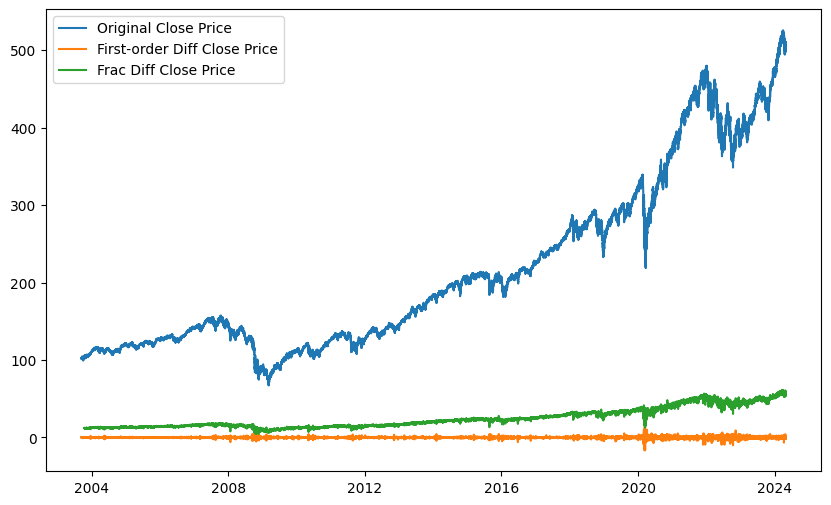

NameError: name 'X' is not defined

In [ ]:
close = df['close']
close_diff = close.diff().dropna()
close_frac_diff = X['close'].dropna()


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(close, label='Original Close Price')
plt.plot(close_diff, label='First-order Diff Close Price')
plt.plot(close_frac_diff, label='Frac Diff Close Price')
plt.title('Comparison of Differencing Effect on Non-Stationary Series')
plt.legend()
plt.show()

In [7]:
# filter the labels by the fractionally differentiated data index
y = df['label'][X.index]
fd_df = pd.concat([X, y], axis=1).dropna()

# pickle it
with open('/mnt/c/Users/Joseph/Documents/Github/balancing_framework/spy5m_labelled_episodes_fracdiff.pkl', 'wb') as f:
    pickle.dump(fd_df, f)

In [20]:
from fracdiff import frac_diff_ffd
d_tests = np.arange(0,1.1,0.1)
fd_res = []
# plt.figure(figsize=(10,6))
for d in d_tests:
    frac_diff_test = frac_diff_ffd(df[['close']], d)
    fd_res.append(frac_diff_test.dropna())

/mnt/c/Users/resha/Documents/Github/balancing_framework/fracdiff.py:189: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series_f = series[[name]].fillna(method='ffill').dropna()
/mnt/c/Users/resha/Documents/Github/balancing_framework/fracdiff.py:189: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series_f = series[[name]].fillna(method='ffill').dropna()
/mnt/c/Users/resha/Documents/Github/balancing_framework/fracdiff.py:189: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series_f = series[[name]].fillna(method='ffill').dropna()
/mnt/c/Users/resha/Documents/Github/balancing_framework/fracdiff.py:189: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.b

In [27]:
fd_res[0]['close']

timestamp
2003-09-10 08:00:00-04:00    102.8600
2003-09-10 08:05:00-04:00    102.9000
2003-09-10 08:10:00-04:00    102.8500
2003-09-10 08:20:00-04:00    102.8000
2003-09-10 08:25:00-04:00    102.7300
                               ...   
2024-04-30 19:40:00-04:00    501.0682
2024-04-30 19:45:00-04:00    501.1500
2024-04-30 19:50:00-04:00    500.9900
2024-04-30 19:55:00-04:00    501.2800
2024-04-30 20:00:00-04:00    501.3000
Name: close, Length: 885831, dtype: float64

0
1
2
3
4
5
6
7
8
9
10


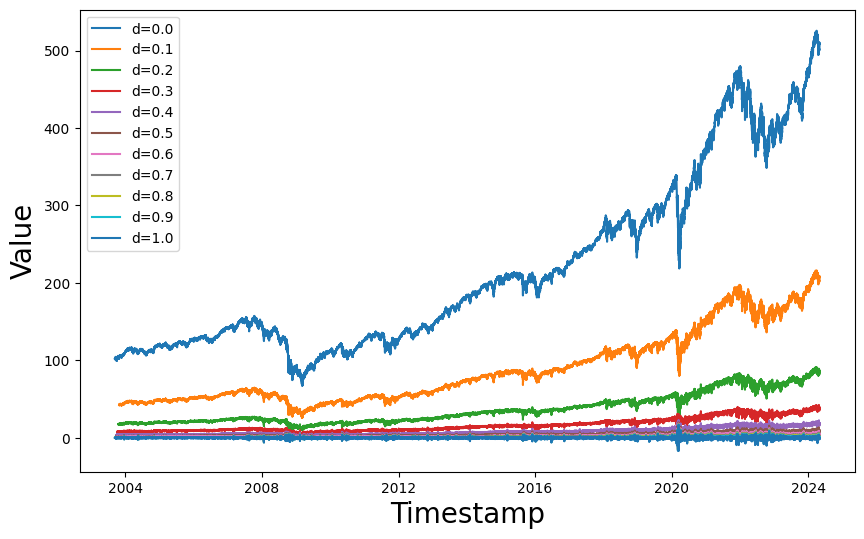

: 

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))

for i,res in enumerate(fd_res): 
    print(i)
    sns.lineplot(data=res['close'], label=f'd={d_tests[i]:.1f}')
plt.legend()
plt.xlabel('Timestamp', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.xticks(fontsize=14) # Adjust X-axis tick label size
plt.yticks(fontsize=14) # Adjust Y-axis tick label size
plt.savefig('fd_testing_comparison_seaborn.png')
plt.show()

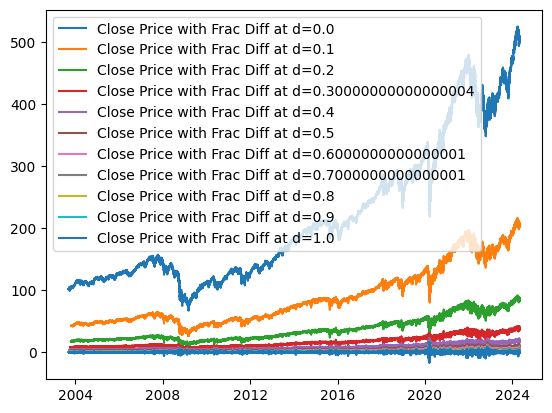

In [32]:
# frac_diff_test = frac_diff_ffd(X[['close']], 0.9)

# iterate through a range of intervals for d and plot the frac diff results

d_tests = np.arange(0,1.1,0.1)
# plt.figure(figsize=(10,6))
for d in d_tests:
    frac_diff_test = frac_diff_ffd(df[['close']], d)
    plt.plot(frac_diff_test['close'].dropna(), label=f'Close Price with Frac Diff at d={d}')
plt.legend()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
# calc the adf in chunks of 100k

adf_chunk_size = 100_000
num_stat = (0,0) # number of stationary windows, total number of windows
p_values = []
for i in range(0, len(frac_diff_test), adf_chunk_size):
    data_chunk = frac_diff_test['close'].dropna()[i:i+adf_chunk_size]
    adf_result = adfuller(data_chunk) 
    print(f'{i} p-value={adf_result[1]}, lags={adf_result[2]}')
    num_stat = (num_stat[0], num_stat[1]+1)
    p_values.append(adf_result[1])
    if adf_result[1] < 0.05:
        num_stat = (num_stat[0]+1, num_stat[1])
# if more than 50% of the p-values are above 0.05, then the data is not stationary
stationary = num_stat[0] > num_stat[1]/2
stationary, num_stat, p_values


0 p-value=0.0, lags=68
100000 p-value=0.0, lags=68
200000 p-value=0.0, lags=67
300000 p-value=0.0, lags=68
400000 p-value=0.0, lags=68
500000 p-value=0.0, lags=66
600000 p-value=0.0, lags=68
700000 p-value=0.0, lags=68
800000 p-value=0.0, lags=64


(True, (9, 9), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])